In [1]:
import os

In [2]:
%pwd

'd:\\IT-service_delivery_risk_predictor\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'd:\\IT-service_delivery_risk_predictor'

In [5]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class EDAConfig:
    root_dir: Path
    data_file: Path
    reports_dir: Path
    plots_dir: Path

In [6]:
from risk_predictor.constants import *
from risk_predictor.utils.common import read_yaml,create_directories

In [7]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)

        create_directories([self.config.artifacts_root])


    def get_eda_config(self) -> EDAConfig:
        config = self.config.eda

        create_directories([config.root_dir, config.reports_dir, config.plots_dir])

        eda_config =  EDAConfig(
            root_dir=config.root_dir,
            data_file=config.data_file,
            reports_dir=config.reports_dir,
            plots_dir=config.plots_dir
        )

        return eda_config    

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from risk_predictor import logger


In [9]:
class EDA:
    def __init__(self, config: EDAConfig):
        self.config = config
        self.df = pd.read_csv(config.data_file)
        logger.info(f"Loaded data from {config.data_file}")


    def basic_summary(self):
        logger.info("Showing basic dataset info")
        summary = {
            "info": str(self.df.info()),
            "describe": self.df.describe().to_dict(),
            "missing_values": self.df.isnull().sum().to_dict(),
            "target_distribution": self.df['predicted_risk'].value_counts().to_dict(),
            
        }
        pd.DataFrame(summary).to_csv(os.path.join(self.config.reports_dir, "eda_summary.csv"))
        logger.info("Saved EDA summary report") 


    def target_distribution(self):
        logger.info("Target distribution plot")
        sns.countplot(x='predicted_risk', data=self.df)
        plt.title("Distribution of Predicted Risk")
        plt.savefig(os.path.join(self.config.plots_dir, "target_distribution.png"))
        plt.show() 
        plt.close()  


    def numeric_analysis(self):
        features = ['planned_duration_days', 'actual_duration_days', 'team_size',
                    'num_bugs', 'num_change_requests', 'delivery_delay_days','budget_overrun_pct']

        logger.info("Histogram of numerical features")
        self.df[features].hist(figsize=(15, 10), bins=30, color='skyblue')
        plt.tight_layout()
        plt.savefig(os.path.join(self.config.plots_dir, "feature_histograms.png"))
        plt.show()
        plt.close()  


        logger.info("Correlation heatmap")
        sns.heatmap(self.df[features].corr(), annot=True, cmap="viridis", fmt=".2f")
        plt.title("Feature Correlation Heatmap")
        plt.savefig(os.path.join(self.config.plots_dir, "correlation_heatmap.png"))
        plt.show()
        plt.close()  

        logger.info("Box plot")
        for i in features:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x='predicted_risk', y=i, data=self.df, palette='Set1')
            plt.title(f'{i} vs Predicted Risk')
            plt.savefig(os.path.join(self.config.plots_dir, f"boxplot_{i}.png"))
            plt.show()
            plt.close()  

        logger.info("EDA plots saved successfully")          


[2025-09-22 20:41:02,771: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-09-22 20:41:02,777: INFO: common: yaml file: params.yaml loaded successfully]
[2025-09-22 20:41:02,781: INFO: common: created directory at: artifacts]
[2025-09-22 20:41:02,784: INFO: common: created directory at: artifacts/eda]
[2025-09-22 20:41:02,787: INFO: common: created directory at: artifacts/eda/reports]
[2025-09-22 20:41:02,788: INFO: common: created directory at: artifacts/eda/plots]
[2025-09-22 20:41:02,923: INFO: 2901885546: Loaded data from artifacts/data_ingestion/data.csv]
[2025-09-22 20:41:02,924: INFO: 2901885546: Showing basic dataset info]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   project_id             50000 non-null  object 
 1   start_date             50000 non-null  object 
 2   end_date         

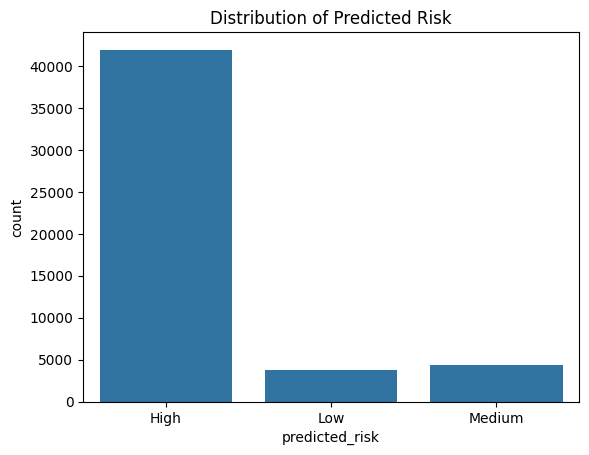

[2025-09-22 20:41:03,619: INFO: 2901885546: Histogram of numerical features]


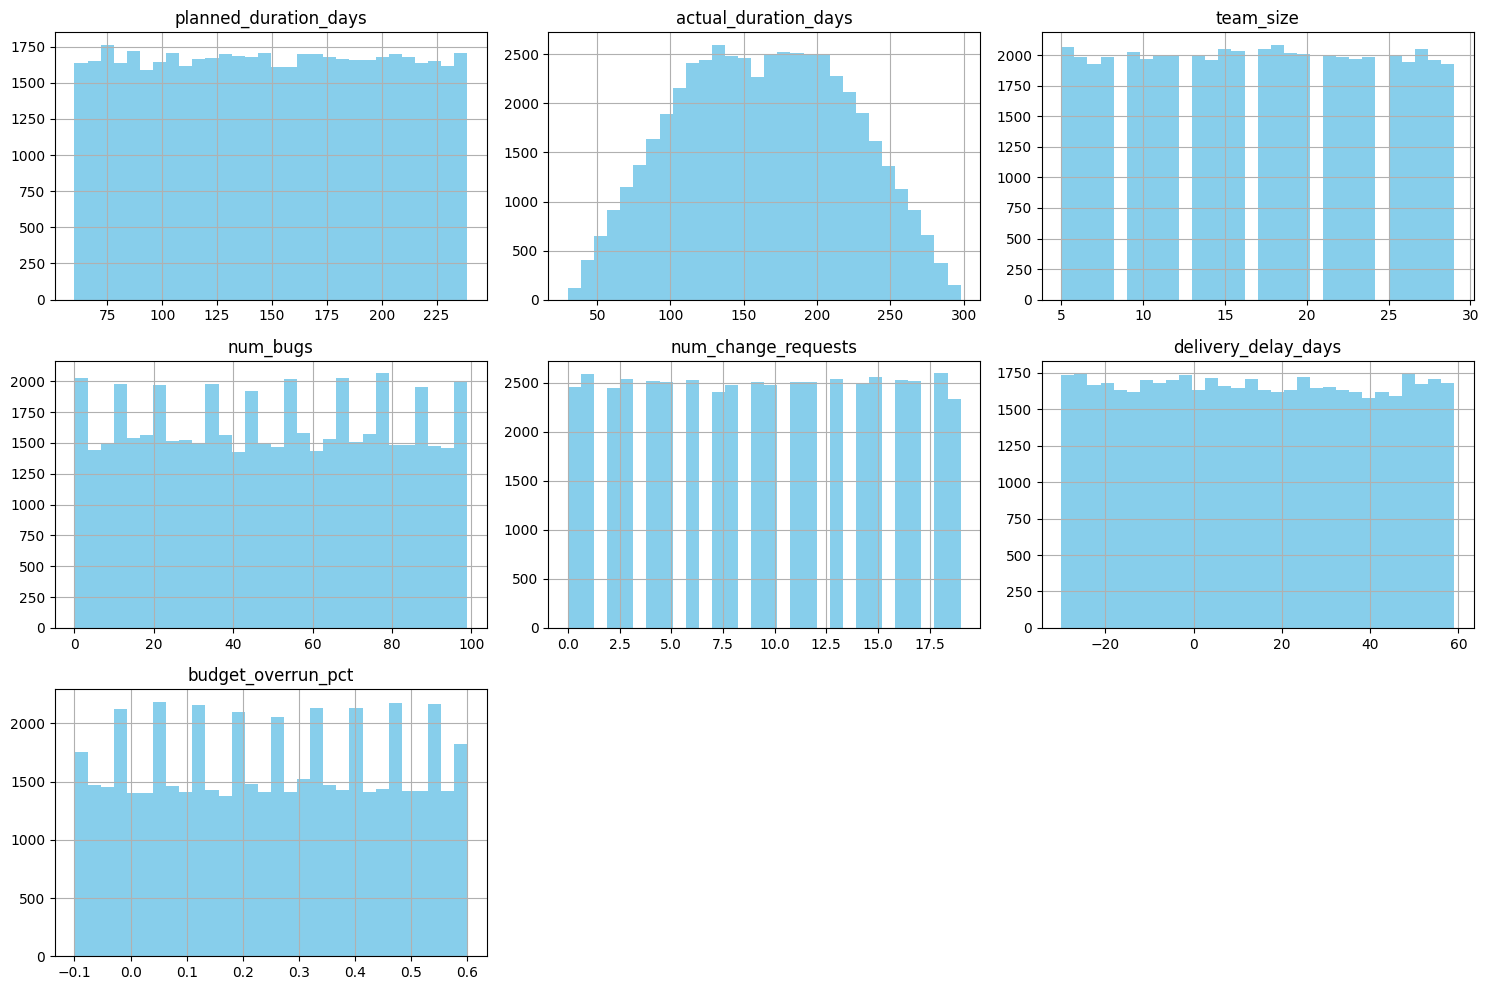

[2025-09-22 20:41:05,886: INFO: 2901885546: Correlation heatmap]


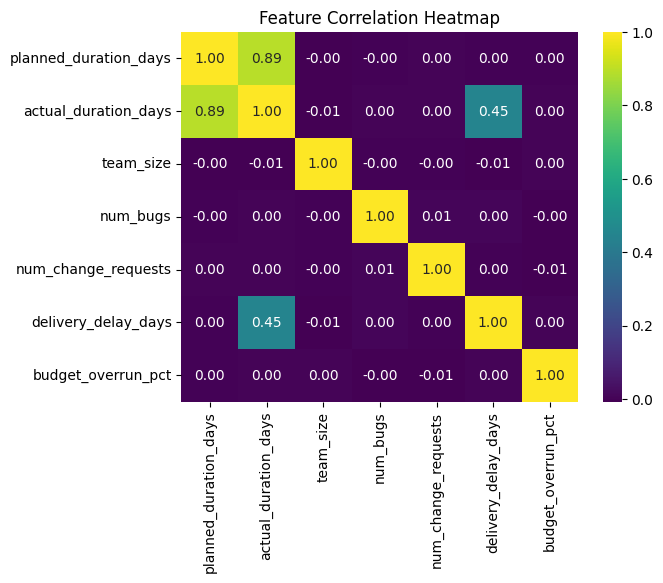

[2025-09-22 20:41:06,465: INFO: 2901885546: Box plot]


C:\Users\Arya\AppData\Local\Temp\ipykernel_20196\2901885546.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_risk', y=i, data=self.df, palette='Set1')


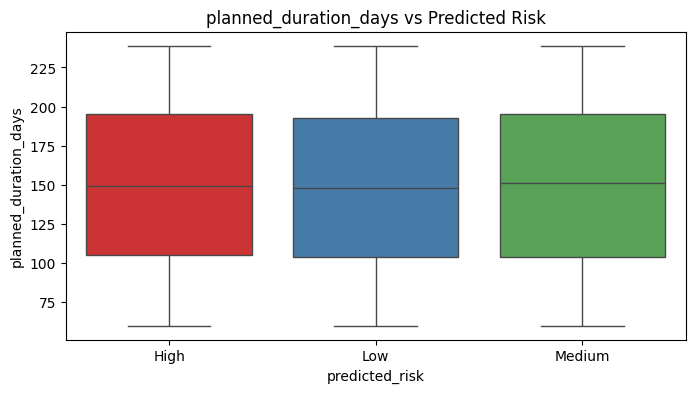

C:\Users\Arya\AppData\Local\Temp\ipykernel_20196\2901885546.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_risk', y=i, data=self.df, palette='Set1')


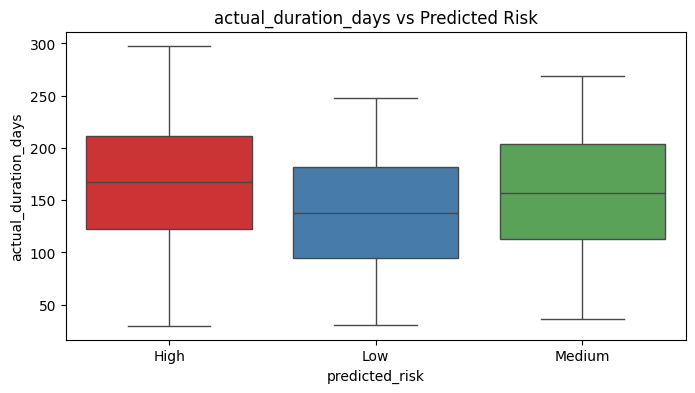

C:\Users\Arya\AppData\Local\Temp\ipykernel_20196\2901885546.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_risk', y=i, data=self.df, palette='Set1')


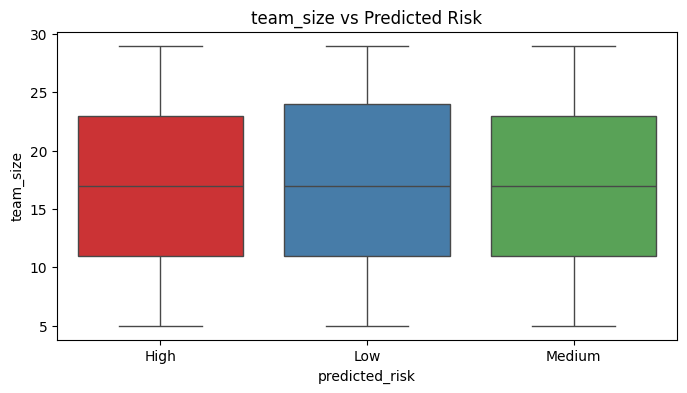

C:\Users\Arya\AppData\Local\Temp\ipykernel_20196\2901885546.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_risk', y=i, data=self.df, palette='Set1')


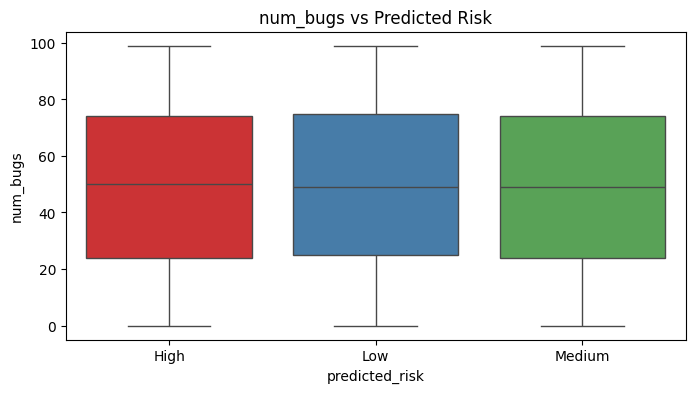

C:\Users\Arya\AppData\Local\Temp\ipykernel_20196\2901885546.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_risk', y=i, data=self.df, palette='Set1')


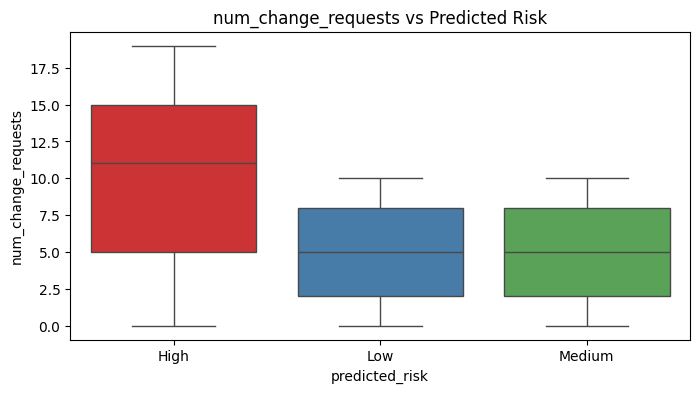

C:\Users\Arya\AppData\Local\Temp\ipykernel_20196\2901885546.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_risk', y=i, data=self.df, palette='Set1')


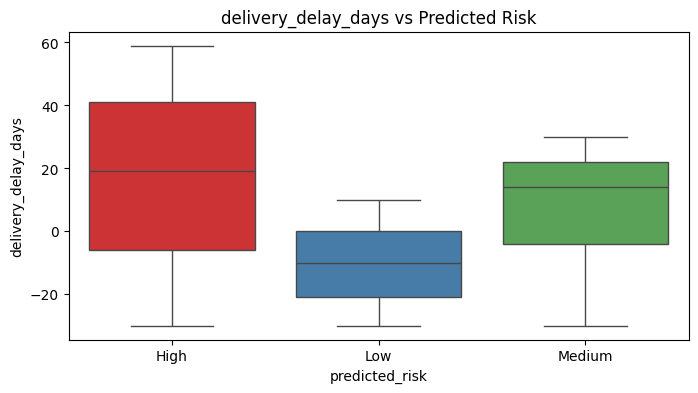

C:\Users\Arya\AppData\Local\Temp\ipykernel_20196\2901885546.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predicted_risk', y=i, data=self.df, palette='Set1')


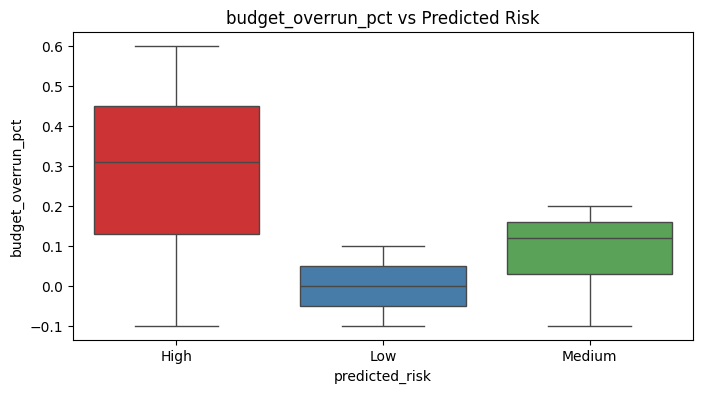

[2025-09-22 20:41:08,834: INFO: 2901885546: EDA plots saved successfully]


In [10]:
try:
    config = ConfigurationManager()
    eda_config = config.get_eda_config()
    eda = EDA(config=eda_config)

    eda.basic_summary()
    eda.target_distribution()
    eda.numeric_analysis()

except Exception as e:
    raise e